In [1]:
from sideinfo import *
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

('Num of alt: ', 6276.0)
('True null prop: ', 0.68619999999999992)
('BH: num of dis, threshold:', 2268, 0.0056629320875590927)
('Storey_BH: num of dis, threshold, null esti', 2725, 0.0097851155747632149, 0.69508333333333339)


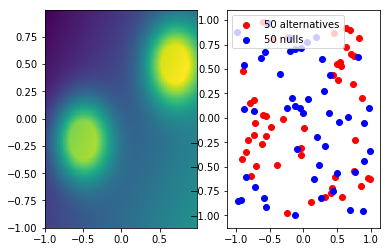

In [22]:
n_samples=20000
p, h, x = generate_data_2D(data_vis=1,n_samples=n_samples, job = 2)
print("Num of alt: ", np.sum(h))
print("True null prop: ", 1-np.sum(h)/n_samples)
dic_BH, t_BH = BH(p)
print("BH: num of dis, threshold:", dic_BH,t_BH)
dic_SBH, t_SBH, pi0_SBH = Storey_BH(p)
print("Storey_BH: num of dis, threshold, null esti", dic_SBH, t_SBH, pi0_SBH)

In [24]:
p_target = opt_threshold_multi(x, p, 20, intensity= 0.1)

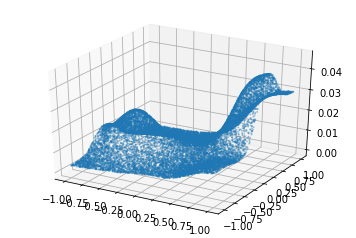

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1] , p_target, s = 1, alpha = 0.3)


In [26]:
network = get_network(num_layers = 10, dim = 2)
optimizer = optim.Adagrad(network.parameters(), lr = 0.01)

In [27]:
print(BH(p))
print(Storey_BH(p))
#p_target = np.ones(x.shape) * Storey_BH(p)[1]
loss_hist = train_network_to_target_p(network, optimizer, x, p_target, num_it = 3000, dim = 2)

(2268, 0.0056629320875590927)
(2725, 0.0097851155747632149, 0.69508333333333339)
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


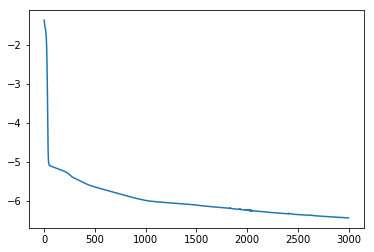

In [35]:
plt.plot(np.log(loss_hist))

In [42]:
#optimizer = optim.Adagrad(network.parameters(), lr = 0.01)
loss_hist, s, s2 = train_network(network, optimizer, x, p, num_it = 3000, dim = 2)

0
100
200
300


(Variable containing:
 0.1603
[torch.FloatTensor of size 1]
, Variable containing:
1.00000e-03 *
  7.9275
[torch.FloatTensor of size 1]
, Variable containing:
1.00000e-02 *
  4.9457
[torch.FloatTensor of size 1]
)


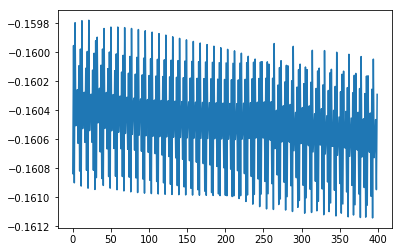

In [43]:
plt.plot(loss_hist)
print(s,s2, s2/s)

In [44]:
n_samples = len(x)
x_input = Variable(torch.from_numpy(x.astype(np.float32).reshape(n_samples ,2)))
p_input = Variable(torch.from_numpy(p.astype(np.float32).reshape(n_samples ,1)))
output = network.forward(x_input)
pred = (p_input < output).data.numpy()
pred = pred[:,0].astype(np.float32)

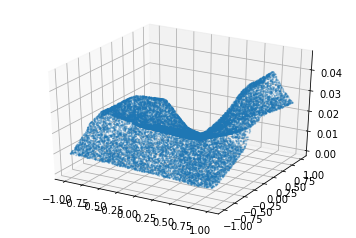

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1] , output.data.numpy(), s = 1, alpha = 0.3)

In [46]:
sum(pred)

3234.0

('Num of alternatives:', 6276.0)
('Num of discovery:', 3234.0)
('Num of true discovery:', 3073.0)
('Actual FDR:', 0.049783549783549819)
Learned rejection threshold:


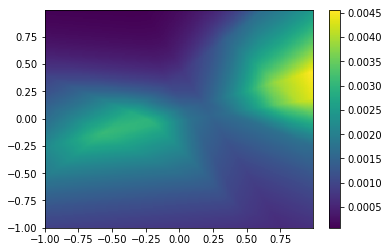

In [47]:
x_input = Variable(torch.from_numpy(x.astype(np.float32).reshape(n_samples ,2)))
p_input = Variable(torch.from_numpy(p.astype(np.float32).reshape(n_samples ,1)))

output = network.forward(x_input)
pred = (p_input < output).data.numpy()
pred = pred[:,0].astype(np.float32)

print("Num of alternatives:",np.sum(h))
print("Num of discovery:",np.sum(pred))
print("Num of true discovery:",np.sum(pred * h))
print("Actual FDR:", 1-np.sum(pred * h) / np.sum(pred))

# Visuaizing the rejection threshold
x_grid = np.arange(-1, 1, 1/100.0)
y_grid = np.arange(-1, 1, 1/100.0)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)

x_in = Variable(torch.from_numpy(
    np.concatenate([[X_grid.flatten()], [Y_grid.flatten()]]).T.astype(np.float32)))
out = network(x_in)
z = out.data.numpy().reshape(X_grid.shape)

print('Learned rejection threshold:')
plt.figure()
plt.pcolor(X_grid, Y_grid, z*0.1)
plt.colorbar()